In [10]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results_dir = '../results'

In [4]:
models = ["Meta-Llama-3-8B-Instruct"]#, "Meta-Llama-3.1-8B-Instruct"]
particles = [1,10,20,50]
proposals = ['character']
proposal_Ks = [None]

experiment_data = []
for model in models:
    for n_particles in particles:
        for proposal in proposals:
            for K in proposal_Ks:
                baseline_name = os.path.join(
                    results_dir, f"{model}-baseline-sampling-p{n_particles}.jsonl"
                )

                with open(baseline_name, 'r') as file:
                    for line in file:
                        line = json.loads(line)
                        if 'correct' not in line:
                                experiment_data.append(
                                    [
                                        model, 
                                        n_particles, 
                                        proposal, 
                                        K,
                                        line['mbr'][0],
                                        np.nan
                                    ]
                                )

                smc_name = os.path.join(
                    results_dir, f"{model}-smc-p{n_particles}-{proposal}{'' if K is None else f'-K{K}'}.jsonl"
                )

                with open(smc_name, 'r') as file:
                    for line in file:
                        line = json.loads(line)
                        if 'correct' not in line:
                                experiment_data.append(
                                    [
                                        model, 
                                        n_particles, 
                                        proposal, 
                                        K,
                                        line['results']['mbr']['result'][0],
                                        line['log_ml']
                                    ]
                                )

In [6]:
df = pd.DataFrame(experiment_data, columns=['model', 'n_particles', 'proposal', 'K', 'mbr', 'log_ml'])

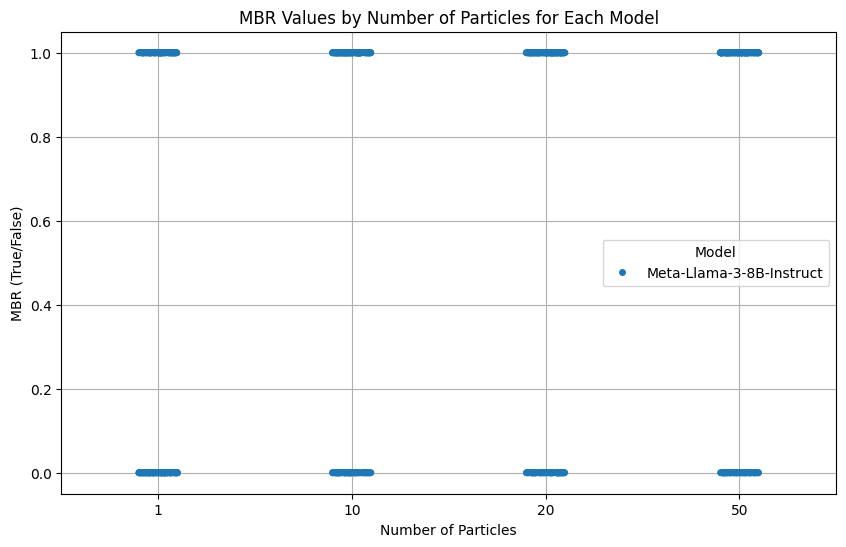

In [11]:
plt.figure(figsize=(10, 6))

# Use a stripplot or swarmplot to show the boolean 'mbr' values by 'n_particles' for each 'model'
sns.stripplot(data=df, x='n_particles', y='mbr', hue='model', jitter=True, dodge=True)

# Optionally use a swarmplot if you want to avoid overlapping points
# sns.swarmplot(data=df, x='n_particles', y='mbr', hue='model', dodge=True)

plt.title('MBR Values by Number of Particles for Each Model')
plt.xlabel('Number of Particles')
plt.ylabel('MBR (True/False)')
plt.legend(title='Model')
plt.grid(True)
plt.show()